In [1]:
from KMeans import *
import numpy as np
import math

In [ ]:
dt = np.dtype([('HeatMiser_ID', np.unicode_, 16), ('Distance_Feature', np.float), ('Speeding_Feature', np.int_), ('Location', np.unicode_, 16), ('OSHA', np.unicode_, 16)])
data = np.loadtxt('HW3_Data.txt', dtype=dt, delimiter='\t', skiprows=1)

testStart = 0
testSize = 400

for i in range(10):
    testSet = data[testStart:testStart+testSize]
    trainSet = data[0:testStart]
    trainSet= np.concatenate((trainSet, data[testStart+testSize:]))
    
    c = KMC(3, 'HeatMiser_ID', ['Distance_Feature', 'Speeding_Feature'], trainSet, 'OSHA')
    c.fit(['Compliant', 'NonCompliant', 'Safe'])
    c.test(testSet)
    
    testStart += testSize

# TODO: shuffle the np array before beginning 10 fold cross validation
# TODO: Print visualization with every fold

moved 55 rows
moved 40 rows
moved 33 rows
moved 18 rows
moved 11 rows
moved 7 rows
moved 4 rows
moved 5 rows
moved 4 rows
moved 3 rows
moved 0 rows
now assigning clusters their labels
metrics are (precision, recall, f1)
Safe: 0.9241379310344827, 0.37960339943342775, 0.538152610441767
Compliant: 0.1111111111111111, 0.5757575757575758, 0.18627450980392157
NonCompliant: 0.03571428571428571, 0.21428571428571427, 0.06122448979591836


In [5]:
a = [1,2]
a[0:0]

[]

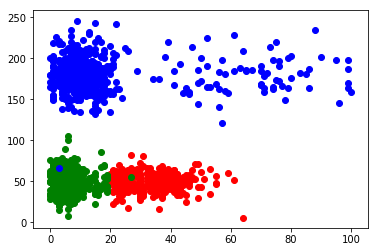

In [31]:
''' plotting the clusters, represented by different colors '''

import matplotlib.pyplot as plt
colors = ['r' , 'g', 'b', 'y']
i = 0
for cluster in c.clusters:
    clusterRows = cluster.getRowsAsNumpy()
    speeds = [x['Speeding_Feature'] for x in clusterRows]
    distances = [x['Distance_Feature'] for x in clusterRows]
    plt.scatter(speeds, distances, c=colors[i])
    i += 1

plt.show()

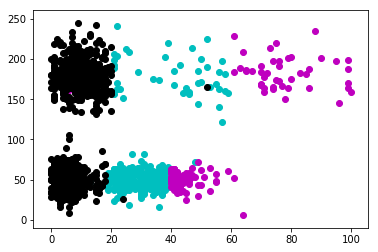

In [35]:
'''plotting the distribution of Compliant, NonCompliant, and Safe data points across the features that
    we arere using to train KMeans '''
    
compliant = [c for c in trainSet if c['OSHA'] == 'Compliant']
noncompliant = [c for c in trainSet if c['OSHA'] == 'NonCompliant']
safe = [c for c in trainSet if c['OSHA'] == 'Safe']

labels = [compliant, noncompliant, safe]

colors = ['c' , 'm', 'k']
i = 0
for cluster in labels:
    speeds = [x['Speeding_Feature'] for x in cluster]
    distances = [x['Distance_Feature'] for x in cluster]
    plt.scatter(speeds, distances, c=colors[i])
    i += 1

# plt.scatter(trainSetSpeeds, trainSetDistances)
plt.show()